**Due on Apr 25, Thursday before class.** *Please submit a report and the Python code in .ipynb
format to Canvas.*


**Problem 1 (5 pts)**
For the Reuter data that we analyzed in class, we did not compare the deep learning results
with any baseline. Please compare the results with Multiclass Logistic Regression, which can
serve as a baseline. Report your findings and submit the Python code as an appendix. (You can
fit a multiclass logistic regression by modifying the code for Reuter data slightly.)

## The Reuters dataset

**Loading the Reuters dataset**

In [196]:
pip install pandoc

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.0/127.0 kB 3.1 MB/s eta 0:00:00a 0:00:01
  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33261 sha256=9729b48a8747b379c2aec0e6dac5059242334385c4e93e5552ff7f124d059990
  Stored in directory: /Users/valerier/Library/Caches/pip/wheels/1c/a9/c4/6254542c4e8202d52fcd69798d2507aaad1f2a4bb60f2f0fea
Successfully built pandoc
Note: you may need to restart the kernel to use updated packages.


In [10]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [11]:
len(train_data)

8982

In [12]:
len(test_data)

2246

In [13]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [14]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [15]:
train_labels[0:10]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16])

### Preparing the data

In [39]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [40]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [41]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [42]:
y_train[0:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 

In [43]:
y_train.shape

(8982, 46)

In [44]:
## A build-in in Keras
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [45]:
y_train.shape

(8982, 46)

### Building your model - Baseline Multiclass Logistic Regression

In [100]:
from tensorflow import keras
from tensorflow.keras import layers

#including only one "softmax" layer to make it logistic regression
model = keras.Sequential([
    layers.Dense(46, activation="softmax")
])

In [101]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [102]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [103]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2674 - loss: 3.4333 - val_accuracy: 0.5970 - val_loss: 2.7306
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6459 - loss: 2.5309 - val_accuracy: 0.6330 - val_loss: 2.2878
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6786 - loss: 2.1008 - val_accuracy: 0.6610 - val_loss: 1.9731
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7067 - loss: 1.7780 - val_accuracy: 0.6900 - val_loss: 1.7414
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7340 - loss: 1.5047 - val_accuracy: 0.7070 - val_loss: 1.5628
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7462 - loss: 1.3290 - val_accuracy: 0.7150 - val_loss: 1.4234
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7740 - loss: 1.1702 - val_accuracy: 0.7310 - val_loss: 1.3184
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7945 - loss: 1.0552 - val_accuracy: 0.7430 - val_loss

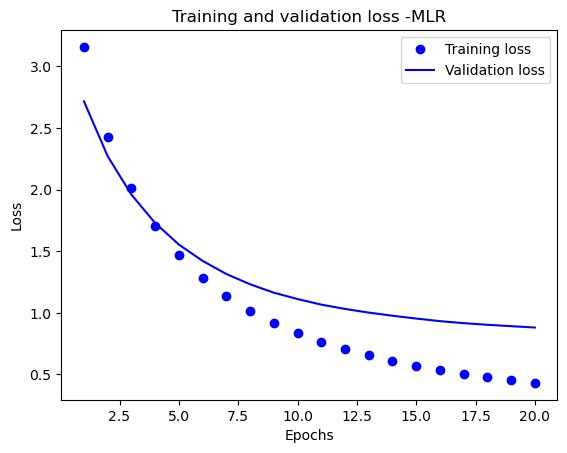

In [89]:
import matplotlib.pyplot as plt
loss_MLR = history.history["loss"]
val_loss_MLR = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss_MLR, "bo", label="Training loss")
plt.plot(epochs, val_loss_MLR, "b", label="Validation loss")
plt.title("Training and validation loss -MLR")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

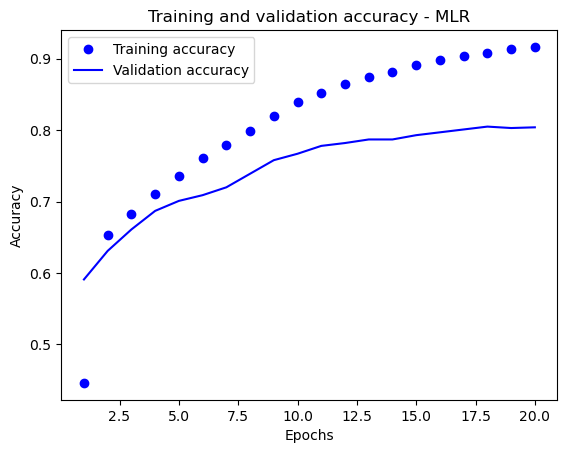

In [91]:
plt.clf()
acc_MLR = history.history["accuracy"]
val_acc_MLR = history.history["val_accuracy"]
plt.plot(epochs, acc_MLR, "bo", label="Training accuracy")
plt.plot(epochs, val_acc_MLR, "b", label="Validation accuracy")
plt.title("Training and validation accuracy - MLR")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Building your model - from Deep Learning Model

In [92]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [93]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [94]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [95]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3114 - loss: 3.2853 - val_accuracy: 0.6130 - val_loss: 1.8517
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6633 - loss: 1.6251 - val_accuracy: 0.6880 - val_loss: 1.3824
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7433 - loss: 1.1780 - val_accuracy: 0.7320 - val_loss: 1.1848
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7920 - loss: 0.9387 - val_accuracy: 0.7720 - val_loss: 1.0602
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8289 - loss: 0.8001 - val_accuracy: 0.7730 - val_loss: 1.0026
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8542 - loss: 0.6657 - val_accuracy: 0.8000 - val_loss: 0.9411
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8918 - loss: 0.5188 - val_accuracy: 0.8050 - val_loss: 0.9170
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8958 - loss: 0.4768 - val_accuracy: 0.8110 - val_loss

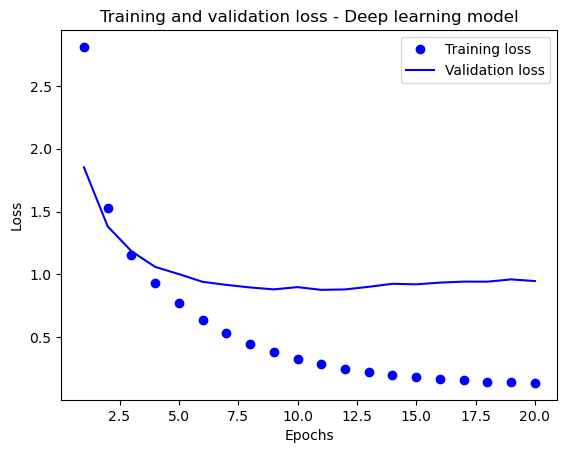

In [96]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss - Deep learning model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

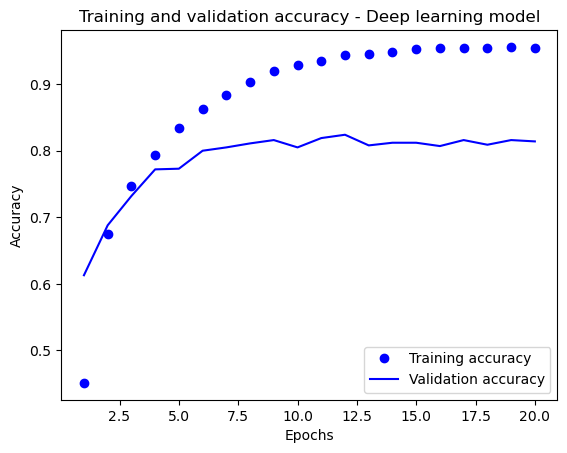

In [97]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy - Deep learning model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Findings**

Based on the results, the deep learning model performs better in terms traning and validation loss. The validation accuracy is also better, and levels off more quickly. For the Multiclass Logistic Regression, there is less of a gap between training/validation accuracy and loss.

**Problem 2 (15 pts) This problem is open-ended.**

In this problem, you will analyze an SMS spam dataset collected from
https://dl.acm.org/doi/10.1145/2034691.2034742. The dataset contains both legitimate SMS
messages (labeled as “ham”) and spam messages (labeled as “spam”). I have prepared a data
matrix where the (𝑖, 𝑗)-th element represents the count of the j-th word in the i-th message. I
have included words that appear in at least 1% of the messages. Your task is to build a deep
neural network model to classify “ham” and “spam” messages. Write a short report about your
analysis. Consider the following questions: Have you compared the results with random
guessing or baselines? Is the metric “accuracy” a good choice for this analysis? The dataset
“messages.csv” is attached.


In [3]:
import pandas as pd

messages = pd.read_csv("/Users/valerier/Desktop/CSU/Machine Learning/messages.csv")

In [4]:
messages.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V1252,V1253,V1254,V1255,V1256,V1257,V1258,V1259,V1260,V1261
0,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,spam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
messages.shape

(5574, 1261)

In [6]:
#Splitting into training and testing datasets
# Select ratio
ratio = 0.75
 
total_rows = messages.shape[0]
train_size = int(total_rows*ratio)
 
# Split data into test and train
train_label = messages.iloc[0:train_size,0]
test_label = messages.iloc[train_size:,0]

# Split data into test and train
train_data = messages.iloc[0:train_size, 1:]
test_data = messages.iloc[train_size:, 1:]



In [26]:
#recode variables 
spam = [0,1]
label = ["ham", "spam"]

train_label= train_label.replace(label, spam)
test_label= test_label.replace(label, spam)

In [27]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])

In [28]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
## please get used to "modifier" (method for class) 

In [29]:
history = model.fit(train_data, train_label, epochs=5, batch_size=128, 
                    validation_data = (test_data, test_label))

Epoch 1/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7109 - loss: 0.6363 - val_accuracy: 0.9627 - val_loss: 0.4372
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9598 - loss: 0.3897 - val_accuracy: 0.9692 - val_loss: 0.2740
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9671 - loss: 0.2454 - val_accuracy: 0.9735 - val_loss: 0.1824
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9792 - loss: 0.1576 - val_accuracy: 0.9770 - val_loss: 0.1320
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9834 - loss: 0.1054 - val_accuracy: 0.9763 - val_loss: 0.1019


In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │        40,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,838 (315.78 KB)

 Trainable params: 40,418 (157.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,420 (157.89 KB)

In [31]:
history_dict = history.history
history_dict.keys() ## dictionary shows keys

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

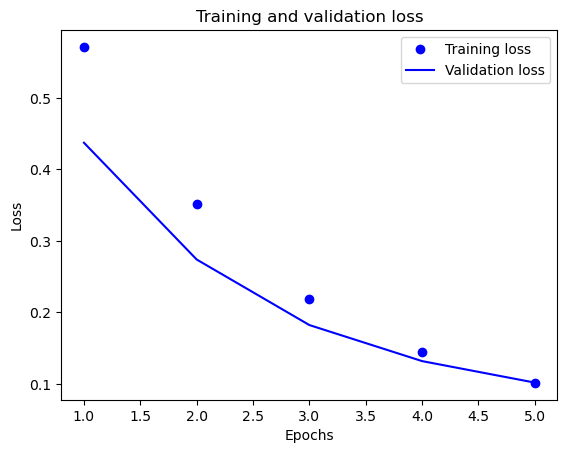

In [32]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

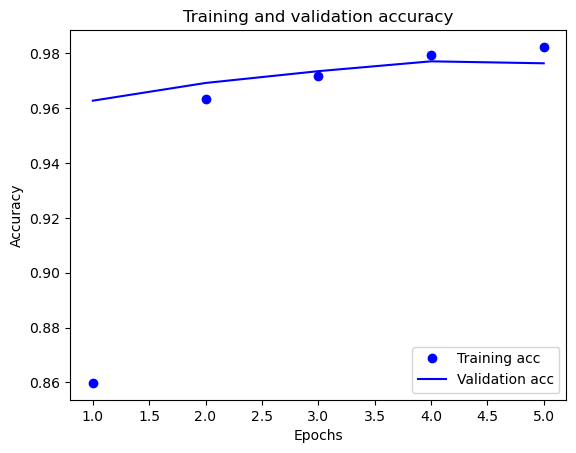

In [33]:
plt.clf()  ## clears the entire current figure with all its axes
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


**Comparision to baseline - Logistic Regression**

In [34]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(2, activation="softmax")
])

In [35]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
## please get used to "modifier" (method for class) 

In [36]:
history = model.fit(train_data, train_label, epochs=5, batch_size=128, 
                    validation_data = (test_data, test_label))

Epoch 1/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7095 - loss: 0.6554 - val_accuracy: 0.9397 - val_loss: 0.5628
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9553 - loss: 0.5387 - val_accuracy: 0.9555 - val_loss: 0.4802
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.9606 - loss: 0.4605 - val_accuracy: 0.9605 - val_loss: 0.4146
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9641 - loss: 0.3984 - val_accuracy: 0.9598 - val_loss: 0.3628
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.9627 - loss: 0.3456 - val_accuracy: 0.9598 - val_loss: 0.3209


In [37]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 2)              │         2,522 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,046 (19.71 KB)

 Trainable params: 2,522 (9.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,524 (9.86 KB)

In [38]:
history_dict = history.history
history_dict.keys() ## dictionary shows keys

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

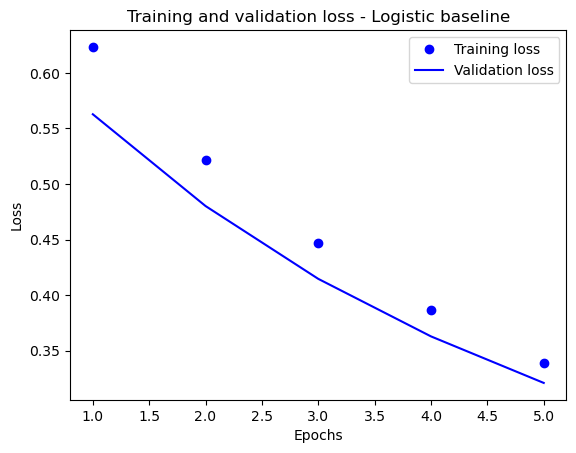

In [39]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss - Logistic baseline")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

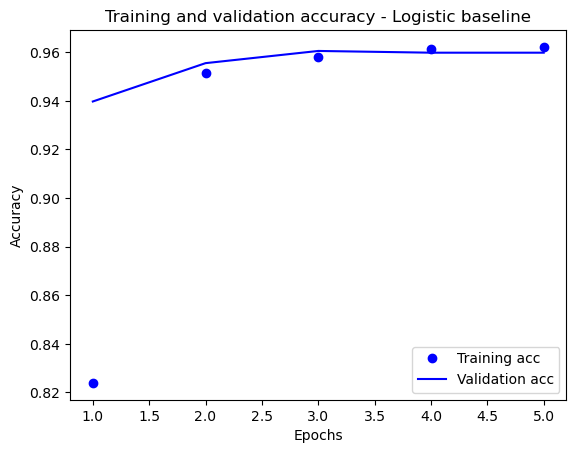

In [40]:
plt.clf()  ## clears the entire current figure with all its axes
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy - Logistic baseline")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Write a short report about your analysis. Consider the following questions: Have you compared the results with random guessing or baselines? Is the metric “accuracy” a good choice for this analysis?

The accuracy is about the same with the baseline logistic regression (the deep learning model performs better by a difference of about 2% in accuracy). This may be because the model only has two binary outcomes, so it is less complex, meaning the logistic model can do a pretty good approximation. 

It may also be the case that "accuracy" is not the best metric for this model as there is a large discrepancy in the number of ham vs spam texts (approximately 87% ham vs 13% spam). It may be better to look at a confusion matrix or other metric.